## Dimensionality Reduction

<img src = "Dimensionality Reduction.jpg">
<img src = "Dimensionality Reduction1.jpg">
<img src = "Dimensionality Reduction2.jpg">
<img src = "Dimensionality Reduction3.jpg">
<img src = "Dimensionality Reduction4.jpg">
<img src = "Dimensionality Reduction5.jpg">
<img src = "Dimensionality Reduction6.jpg">
<img src = "Dimensionality Reduction7.jpg">
<img src = "Dimensionality Reduction8.jpg">
<img src = "Dimensionality Reduction9.jpg">
<img src = "Dimensionality Reduction10.jpg">
<img src = "Dimensionality Reduction11.jpg">
<img src = "Dimensionality Reduction12.jpg">
<img src = "Dimensionality Reduction13.jpg">
<img src = "Dimensionality Reduction14.jpg">
<img src = "Dimensionality Reduction15.jpg">
<img src = "Dimensionality Reduction16.jpg">

# Machine Learning Foundation

## Course 4, Part c: Dimensionality Reduction DEMO


## Introduction

We will be using customer data from a [Portuguese wholesale distributor](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for clustering. This data file is called `Wholesale_Customers_Data`.

It contains the following features:

*   Fresh: annual spending (m.u.) on fresh products
*   Milk: annual spending (m.u.) on milk products
*   Grocery: annual spending (m.u.) on grocery products
*   Frozen: annual spending (m.u.) on frozen products
*   Detergents_Paper: annual spending (m.u.) on detergents and paper products
*   Delicatessen: annual spending (m.u.) on delicatessen products
*   Channel: customer channel (1: hotel/restaurant/cafe or 2: retail)
*   Region: customer region (1: Lisbon, 2: Porto, 3: Other)

In this data, the values for all spending are given in an arbitrary unit (m.u. = monetary unit).


In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import seaborn as sns, pandas as pd, numpy as np

In [2]:
import seaborn as sns
coloribm = {"Magenta 100":"2A0A16", "Magenta 90":"57002B", "Magenta 80":"760A3A", "Magenta 70":"A11950", "Magenta 60":"D12765", "Magenta 50":"EE538B", "Magenta 40":"FA75A6", "Magenta 30":"FFA0C2", "Magenta 20":"FFCFE1", "Magenta 10":"FFF0F6", "Purple 100":"1E1033", "Purple 90":"38146B", "Purple 80":"4F2196", "Purple 70":"6E32C9", "Purple 60":"8A3FFC", "Purple 50":"A66EFA", "Purple 40":"BB8EFF", "Purple 30":"D0B0FF", "Purple 20":"E6D6FF", "Purple 10":"F7F1FF", "Blue 100":"051243", "Blue 90":"061F80", "Blue 80":"0530AD", "Blue 70":"054ADA", "Blue 60":"0062FF", "Blue 50":"408BFC", "Blue 40":"6EA6FF", "Blue 30":"97C1FF", "Blue 20":"C9DEFF", "Blue 10":"EDF4FF", "Teal 100":"081A1C", "Teal 90":"003137", "Teal 80":"004548", "Teal 70":"006161", "Teal 60":"007D79", "Teal 50":"009C98", "Teal 40":"00BAB6", "Teal 30":"20D5D2", "Teal 20":"92EEEE", "Teal 10":"DBFBFB", "Gray 100":"171717", "Gray 90":"282828", "Gray 80":"3D3D3D", "Gray 70":"565656", "Gray 60":"6F6F6F", "Gray 50":"8C8C8C", "Gray 40":"A4A4A4", "Gray 30":"BEBEBE", "Gray 20":"DCDCDC", "Gray 10":"F3F3F3"} 
colors = []
colornum = 60
for i in [f'Blue {colornum}', f'Teal {colornum}', f'Magenta {colornum}', f'Purple {colornum}', f'Gray {colornum}']:
    colors.append(f'#{coloribm[i]}')
palette = sns.color_palette(colors)

In [3]:
import os, pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
sns.set_palette(palette)

## Part 1

In this section, we will:

*   Import the data and check the data types.
*   Drop the channel and region columns as they won't be used since we focus on numeric columns for this example.
*   Convert the remaining columns to floats if necessary.
*   Copy this version of the data (using the `copy` method) to a variable to preserve it. We will be using it later.


In [19]:
data = pd.read_csv('Wholesale_Customers_Data.csv', sep=',')

In [20]:
data.shape

(440, 8)

In [21]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [22]:
data = data.drop(['Channel', 'Region'], axis=1)

In [23]:
data.dtypes

Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [24]:
# Convert to floats
for col in data.columns:
    data[col] = data[col].astype(np.float)

Preserve the original data.


In [25]:
data_orig = data.copy()

## Part 2

As with the previous lesson, we need to ensure the data is scaled and (relatively) normally distributed.

*   Examine the correlation and skew.
*   Perform any transformations and scale data using your favorite scaling method.
*   View the pairwise correlation plots of the new data.


In [26]:
corr_mat = data.corr()

# Strip the diagonal for future examination
for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,0.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,0.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,0.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,0.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,0.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,0.000000


As before, the two categories with their respective most strongly correlated variable.


In [27]:
corr_mat.abs().idxmax()

Fresh                         Frozen
Milk                         Grocery
Grocery             Detergents_Paper
Frozen                    Delicassen
Detergents_Paper             Grocery
Delicassen                      Milk
dtype: object

Examine the skew values and log transform. Looks like all of them need it.


In [28]:
log_columns = data.skew().sort_values(ascending=False)
log_columns = log_columns.loc[log_columns > 0.75] 

log_columns

Delicassen          11.151586
Frozen               5.907986
Milk                 4.053755
Detergents_Paper     3.631851
Grocery              3.587429
Fresh                2.561323
dtype: float64

In [29]:
# The log transformations
for col in log_columns.index:
    data[col] = np.log1p(data[col])

Scale the data again. Let's use `MinMaxScaler` this time just to mix things up.


In [30]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

for col in data.columns:
    data[col] = mms.fit_transform(data[[col]]).squeeze()

Visualize the relationship between the variables.


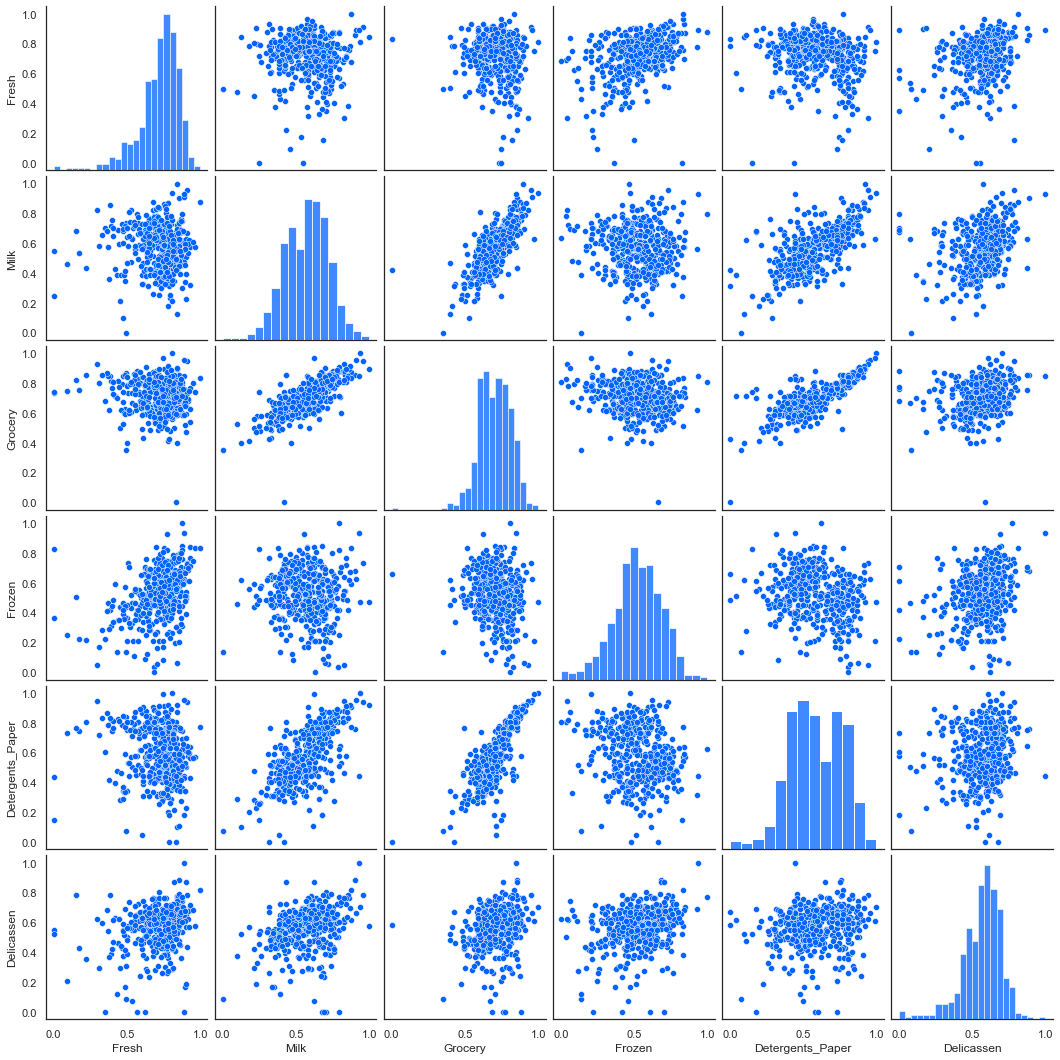

In [31]:
sns.set_context('notebook')
sns.set_style('white')
sns.pairplot(data)

## Part 3

In this section, we will:

*   Using Scikit-learn's [pipeline function](http://scikit-learn.org/stable/modules/pipeline.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01), recreate the data pre-processing scheme above (transformation and scaling) using a pipeline. If you used a non-Scikit learn function to transform the data (e.g. NumPy's log function), checkout  the custom transformer class called [`FunctionTransformer`](http://scikit-learn.org/stable/modules/preprocessing.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01#custom-transformers).
*   Use the pipeline to transform the original data that was stored at the end of question 1.
*   Compare the results to the original data to verify that everything worked.

*Note:* Scikit-learn has a more flexible `Pipeline` function and a shortcut version called `make_pipeline`. Either can be used. Also, if different transformations need to be performed on the data, a [`FeatureUnion`](http://scikit-learn.org/stable/modules/pipeline.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01#featureunion-composite-feature-spaces) can be used.


In [32]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

# The custom NumPy log transformer
log_transformer = FunctionTransformer(np.log1p)

# The pipeline
estimators = [('log1p', log_transformer), ('minmaxscale', MinMaxScaler())]
pipeline = Pipeline(estimators)

# Convert the original data
data_pipe = pipeline.fit_transform(data_orig)

The results are identical. Note that machine learning models and grid searches can also be added to the pipeline (and in fact, usually are.)


In [33]:
np.allclose(data_pipe, data)

True

## Part 4

In this section, we will:

*   Perform PCA with `n_components` ranging from 1 to 5.
*   Store the amount of explained variance for each number of dimensions.
*   Also store the feature importance for each number of dimensions. *Hint:* PCA doesn't explicitly provide this after a model is fit, but the `components_` properties can be used to determine something that approximates importance. How you decided to do so is entirely up to you.
*   Plot the explained variance and feature importances.


In [34]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 6):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(data)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': data.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.448011
2,PCA(n_components=2),0.72099
3,PCA(n_components=3),0.827534
4,PCA(n_components=4),0.923045
5,PCA(n_components=5),0.979574


Create a table of feature importances for each data column.


In [35]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

features_df

features,Delicassen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
n,,,,,,
1,0.071668,0.335487,0.060620,0.095979,0.190236,0.246010
2,0.151237,0.177519,0.158168,0.222172,0.112032,0.178872
3,0.165518,0.145815,0.211434,0.268363,0.084903,0.123967
4,0.224259,0.149981,0.239527,0.214275,0.070971,0.100987
5,0.211840,0.182447,0.196382,0.178104,0.067338,0.163888


Create a plot of explained variances.


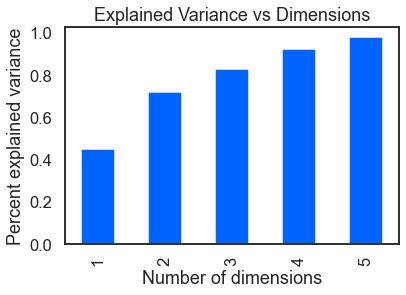

In [36]:
sns.set_context('talk')
ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

And here's a plot of feature importances.


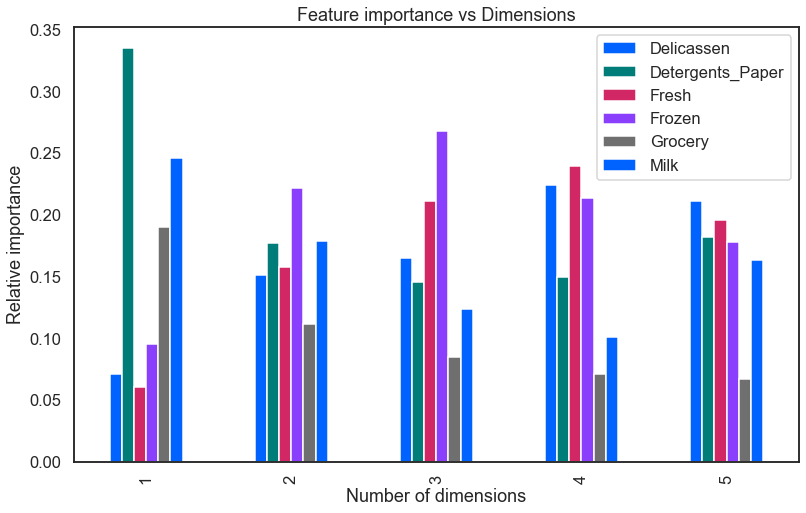

In [37]:
ax = features_df.plot(kind='bar', figsize=(13,8))
ax.legend(loc='upper right')
ax.set(xlabel='Number of dimensions',
       ylabel='Relative importance',
       title='Feature importance vs Dimensions');

## Part 5

In this section, we will:

*   Fit a `KernelPCA` model with `kernel='rbf'`. You can choose how many components and what values to use for the other parameters (`rbf` refers to a Radial Basis Function kernel, and the `gamma` parameter governs scaling of this kernel and typically ranges between 0 and 1). Several other [kernels](https://scikit-learn.org/stable/modules/metrics.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) can be tried, and even passed ss cross validation parameters (see this [example](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01)).
*   If you want to tinker some more, use `GridSearchCV` to tune the parameters of the `KernelPCA` model.

The second step is tricky since grid searches are generally used for supervised machine learning methods and rely on scoring metrics, such as accuracy, to determine the best model. However, a custom scoring function can be written for `GridSearchCV`, where larger is better for the outcome of the scoring function.

What would such a metric involve for PCA? What about percent of explained variance? Or perhaps the negative mean squared error on the data once it has been transformed and then inversely transformed?


In [38]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Custom scorer--use negative rmse of inverse transform
def scorer(pcamodel, X, y=None):

    try:
        X_val = X.values
    except:
        X_val = X
        
    # Calculate and inverse transform the data
    data_inv = pcamodel.fit(X_val).transform(X_val)
    data_inv = pcamodel.inverse_transform(data_inv)
    
    # The error calculation
    mse = mean_squared_error(data_inv.ravel(), X_val.ravel())
    
    # Larger values are better for scorers, so take negative value
    return -1.0 * mse

# The grid search parameters
param_grid = {'gamma':[0.001, 0.01, 0.05, 0.1, 0.5, 1.0],
              'n_components': [2, 3, 4]}

# The grid search
kernelPCA = GridSearchCV(KernelPCA(kernel='rbf', fit_inverse_transform=True),
                         param_grid=param_grid,
                         scoring=scorer,
                         n_jobs=-1)


kernelPCA = kernelPCA.fit(data)

kernelPCA.best_estimator_

KernelPCA(fit_inverse_transform=True, gamma=1.0, kernel='rbf', n_components=4)

## Part 6

Let's explore how our model accuracy may change if we include a `PCA` in our model building pipeline. Let's plan to use sklearn's `Pipeline` class and create a pipeline that has the following steps:

<ol>
  <li>A scaler</li>
  <li>`PCA(n_components=n)`</li>
  <li>`LogisticRegression`</li>
</ol>

*   Load the Human Activity data from the datasets.
*   Write a function that takes in a value of `n` and makes the above pipeline, then predicts the "Activity" column over a 5-fold StratifiedShuffleSplit, and returns the average test accuracy
*   For various values of n, call the above function and store the average accuracies.
*   Plot the average accuracy by number of dimensions.


In [39]:
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/Human_Activity_Recognition_Using_Smartphones_Data.csv', sep=',')

In [40]:
data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Activity'],
      dtype='object', length=562)

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = data.drop('Activity', axis=1)
y = data.Activity
sss = StratifiedShuffleSplit(n_splits=5, random_state=42)

def get_avg_score(n):
    pipe = [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n)),
        ('estimator', LogisticRegression(solver='liblinear'))
    ]
    pipe = Pipeline(pipe)
    scores = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        pipe.fit(X_train, y_train)
        scores.append(accuracy_score(y_test, pipe.predict(X_test)))
    return np.mean(scores)


ns = [10, 20, 50, 100, 150, 200, 300, 400]
score_list = [get_avg_score(n) for n in ns]

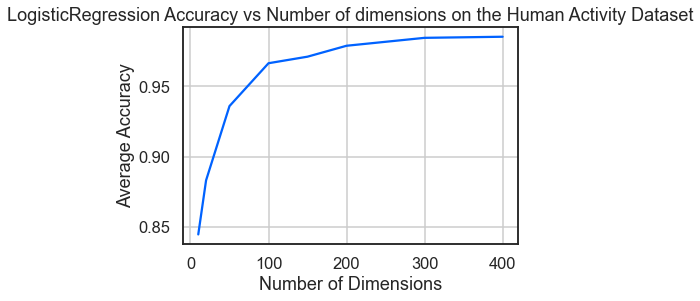

In [42]:
sns.set_context('talk')

ax = plt.axes()
ax.plot(ns, score_list)
ax.set(xlabel='Number of Dimensions',
       ylabel='Average Accuracy',
       title='LogisticRegression Accuracy vs Number of dimensions on the Human Activity Dataset')
ax.grid(True)

***


### Non Negative Matrix Factorization

<img src = "Non Negative Matrix Factorization.jpg">
<img src = "Non Negative Matrix Factorization1.jpg">
<img src = "Non Negative Matrix Factorization2.jpg">
<img src = "Non Negative Matrix Factorization3.jpg">
<img src = "Non Negative Matrix Factorization4.jpg">

# Machine Learning Foundation

## Course 4, Part e: Non-Negative Matrix Factorization DEMO

This exercise illustrates usage of Non-negative Matrix factorization and covers techniques related to sparse matrices and some basic work with Natural Langauge Processing.  We will use NMF to look at the top words for given topics.

## Data

We'll be using the BBC dataset. These are articles collected from 5 different topics, with the data pre-processed. 

These data are available in the data folder (or online [here](http://mlg.ucd.ie/files/datasets/bbc.zip)). The data consists of a few files. The steps we'll be following are:

* *bbc.terms* is just a list of words 
* *bbc.docs* is a list of artcles listed by topic.

At a high level, we're going to 

1. Turn the `bbc.mtx` file into a sparse matrix (a [sparse matrix](https://docs.scipy.org/doc/scipy/reference/sparse.html) format can be useful for matrices with many values that are 0, and save space by storing the position and values of non-zero elements).
1. Decompose that sparse matrix using NMF.
1. Use the resulting components of NMF to analyze the topics that result.

## Data Setup

In [50]:
with open('bbc.mtx') as f:
    content = f.readlines()

In [51]:
content

['%%MatrixMarket matrix coordinate real general\n',
 '9635 2225 286774\n',
 '1 1 1.0\n',
 '1 7 2.0\n',
 '1 11 1.0\n',
 '1 14 1.0\n',
 '1 15 2.0\n',
 '1 19 2.0\n',
 '1 21 1.0\n',
 '1 29 1.0\n',
 '1 30 1.0\n',
 '1 33 1.0\n',
 '1 35 1.0\n',
 '1 41 1.0\n',
 '1 45 1.0\n',
 '1 47 2.0\n',
 '1 50 1.0\n',
 '1 52 1.0\n',
 '1 53 3.0\n',
 '1 55 1.0\n',
 '1 61 1.0\n',
 '1 62 1.0\n',
 '1 63 1.0\n',
 '1 65 1.0\n',
 '1 69 1.0\n',
 '1 80 1.0\n',
 '1 81 1.0\n',
 '1 86 1.0\n',
 '1 93 1.0\n',
 '1 99 1.0\n',
 '1 100 1.0\n',
 '1 104 1.0\n',
 '1 105 1.0\n',
 '1 106 1.0\n',
 '1 112 1.0\n',
 '1 116 3.0\n',
 '1 117 1.0\n',
 '1 118 2.0\n',
 '1 120 1.0\n',
 '1 121 1.0\n',
 '1 126 1.0\n',
 '1 131 4.0\n',
 '1 133 1.0\n',
 '1 134 3.0\n',
 '1 138 2.0\n',
 '1 140 2.0\n',
 '1 143 1.0\n',
 '1 151 2.0\n',
 '1 152 2.0\n',
 '1 175 1.0\n',
 '1 176 1.0\n',
 '1 177 1.0\n',
 '1 180 1.0\n',
 '1 184 1.0\n',
 '1 189 1.0\n',
 '1 194 1.0\n',
 '1 195 1.0\n',
 '1 198 1.0\n',
 '1 201 1.0\n',
 '1 206 1.0\n',
 '1 207 3.0\n',
 '1 208 1.0

In [52]:
content.pop(0)
content.pop(0)

'9635 2225 286774\n'

## Part 1

Here, we will turn this into a list of tuples representing a [sparse matrix](https://docs.scipy.org/doc/scipy/reference/sparse.html). Remember the description of the file from above:

* *bbc.mtx* is a list: first column is **wordID**, second is **articleID** and the third is the number of times that word appeared in that article.

So, if word 1 appears in article 3, 2 times, one element of our list will be:

`(1, 3, 2)`

In [53]:
sparsemat = [tuple(map(int,map(float,c.split()))) for c in content]
# Let's examine the first few elements
sparsemat[:8]

[(1, 1, 1),
 (1, 7, 2),
 (1, 11, 1),
 (1, 14, 1),
 (1, 15, 2),
 (1, 19, 2),
 (1, 21, 1),
 (1, 29, 1)]

## Part 2: Preparing Sparse Matrix data for NMF 

We will use the [coo matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html) function to turn the sparse matrix into an array. 

In [54]:
import numpy as np
from scipy.sparse import coo_matrix
rows = [x[0] for x in sparsemat]
cols = [x[1] for x in sparsemat]
values = [x[2] for x in sparsemat]
coo = coo_matrix((values, (rows, cols)))

## NMF

NMF is a way of decomposing a matrix of documents and words so that one of the matrices can be interpreted as the "loadings" or "weights" of each word on a topic. 

Check out [the NMF documentation](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html) and the [examples of topic extraction using NMF and LDA](http://scikit-learn.org/0.18/auto_examples/applications/topics_extraction_with_nmf_lda.html).

## Part 3

Here, we will import `NMF`, define a model object with 5 components, and `fit_transform` the data created above.

In [55]:
from sklearn.decomposition import NMF
model = NMF(n_components=5, init='random', random_state=818)
doc_topic = model.fit_transform(coo)

doc_topic.shape
# we should have 9636 observations (articles) and five latent features

(9636, 5)

In [56]:
# find feature with highest value per doc
np.argmax(doc_topic, axis=1)

array([0, 0, 2, ..., 4, 4, 4], dtype=int64)

## Part 4: 

Check out the `components` of this model:

In [57]:
model.components_.shape

(5, 2226)

This is five rows, each of which is a "topic" containing the weights of each word on that topic. The exercise is to _get a list of the top 10 words for each topic_. We can just store this in a list of lists.

**Note:** Just like we read in the data above, we'll have to read in the words from the `bbc.terms` file.

In [59]:
with open('bbc.terms') as f:
    content = f.readlines()
words = [c.split()[0] for c in content]

In [60]:
topic_words = []
for r in model.components_:
    a = sorted([(v,i) for i,v in enumerate(r)],reverse=True)[0:12]
    topic_words.append([words[e[1]] for e in a])

In [61]:
# Here, each set of words relates to the corresponding topic (ie the first set of words relates to topic 'Business', etc.)
topic_words[:5]

[['bondi',
  'stanlei',
  'continent',
  'mortgag',
  'bare',
  'least',
  'extent',
  '200',
  'leav',
  'frustrat',
  'yuan',
  'industri'],
 ['manipul',
  'teenag',
  'drawn',
  'go',
  'prosecutor',
  'herbert',
  'host',
  'protest',
  'hike',
  'nation',
  'calcul',
  'power'],
 ['dimens',
  'hous',
  'march',
  'wider',
  'owner',
  'intend',
  'declin',
  'forc',
  'posit',
  'founder',
  'york',
  'unavail'],
 ['rome',
  'ft',
  'regain',
  'lawmak',
  'outright',
  'resum',
  'childhood',
  'greatest',
  'citi',
  'stagnat',
  'crown',
  'bodi'],
 ['build',
  'empir',
  'isol',
  'Â£12',
  'restructur',
  'closer',
  'plung',
  'depreci',
  'durham',
  'race',
  'juli',
  'segreg']]

The original data had 5 topics, as listed in `bbc.docs` (which these topic words relate to). 

```
Business
Entertainment
Politics
Sport
Tech
```

In "real life", we would have found a way to use these to inform the model. But for this little demo, we can just compare the recovered topics to the original ones. And they seem to match reasonably well. The order is different, which is to be expected in this kind of model.

In [63]:
with open('bbc.docs') as d:
    doc_content = d.readlines()
    
doc_content[:8]

['business.001\n',
 'business.002\n',
 'business.003\n',
 'business.004\n',
 'business.005\n',
 'business.006\n',
 'business.007\n',
 'business.008\n']

---

### PCA Application in Image Processing

<img src = "Imaging.jpg">
<img src = "Imaging1.jpg">
<img src = "Imaging2.jpg">
<img src = "Imaging3.jpg">
<img src = "Imaging4.jpg">
<img src = "Imaging5.jpg">
<img src = "Imaging6.jpg">
<img src = "Imaging7.jpg">
<img src = "Imaging8.jpg">
<img src = "Imaging9.jpg">
<img src = "Imaging10.jpg">
<img src = "Imaging11.jpg">